In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as spi
from scipy.optimize import curve_fit,minimize,fmin
import numpy as np
import matplotlib 
import pickle as pkl  
np.set_printoptions(suppress=True)
plt.rc('text', usetex=True)
%matplotlib inline

dataDir = "../data/"
imageDir = "../images/"

In [4]:
menParams = pkl.load(open(dataDir + "pkls/menSIRParams.pkl", "rb"))
fluParams = pkl.load(open(dataDir + "pkls/fluSIRParams.pkl", "rb"))
flu_menParams = pkl.load(open(dataDir + "pkls/flu_menSIIRParams.pkl", "rb"))
print("Flu Params: ",fluParams)
print("Men Params: ",menParams)
print("Flu-Men Params",flu_menParams)

Flu Params:  {2017: [8.993779282533158, 8.347865953418331, 0.8051828650381628], 2008: [42.5326377333672, 41.95061087323178, 0.6177425164247533], 2009: [23.119115425141842, 22.083991154996014, 0.7438191626954874], 2010: [32.30813365036235, 31.80694514966924, 0.5097104487520645], 2011: [22.91502211555694, 22.474019634990025, 0.40824883608999374], 2012: [24.891229614896744, 24.092996505166525, 0.39765302267157104], 2013: [22.01052108945536, 21.5885895533915, 0.40562738960738526], 2014: [14.516747435308488, 14.01013969373412, 0.9477372372115072], 2015: [13.718650206765938, 13.121294215858713, 0.6382422553379445], 2016: [14.199845208468432, 13.651995896143694, 0.5599832630790567]}
Men Params:  {2017: [69.37033397309656, 69.30257707258437, 0.1516317620776813], 2009: [60.231846774940124, 60.21980222020443, 0.15275229894586662], 2010: [-0.007996924771336527, 1.5674723254362843e-05, 0.10309441643286982], 2011: [-0.0012161035454762803, 0.04575438032812004, 0.10341005926078485], 2012: [168.305910

In [6]:
error = {}
for year in flu_menParams.keys():
    error[year]={'flu':[fluParams[year][-1],flu_menParams[year][-2]],
                'men':[menParams[year][-1],flu_menParams[year][-1]]}   
print(error)
print(len(error))

{2009: {'flu': [0.7438191626954874, 0.7439167622541205], 'men': [0.15275229894586662, 0.1272656358964839]}, 2012: {'flu': [0.39765302267157104, 0.3976564879459555], 'men': [0.13257514233058662, 0.13040946844182208]}, 2013: {'flu': [0.40562738960738526, 0.4056401021364764], 'men': [0.1530242986181454, 0.14911832026510727]}, 2014: {'flu': [0.9477372372115072, 0.9477306048939026], 'men': [0.045270446046769275, 0.04452110019059561]}, 2015: {'flu': [0.6382422553379445, 0.6382410158930328], 'men': [0.0650289278363755, 0.061948754314173154]}, 2016: {'flu': [0.5599832630790567, 0.5591836711757141], 'men': [0.12449161250375251, 0.05691946666447748]}, 2017: {'flu': [0.8051828650381628, 0.8051982346359865], 'men': [0.1516317620776813, 0.13517621961144763]}}
7


In [8]:
np.empty((2,7))

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [11]:
errorFlu = np.empty((2,len(error)))
errorFlu_Interactive = np.empty((2,len(error)))
errorMen = np.empty((2,len(error)))
errorMen_Interactive = np.empty((2,len(error)))

i=0
for y,e in error.items():
    errorFlu[0,i] = y
    errorFlu[1,i] = e['flu'][0]
    errorFlu_Interactive[0,i] = y
    errorFlu_Interactive[1,i] = e['flu'][1]
    errorMen[0,i] = y
    errorMen[1,i] = e['men'][0]
    errorMen_Interactive[0,i] = y
    errorMen_Interactive[1,i] = e['men'][1]
    i+=1

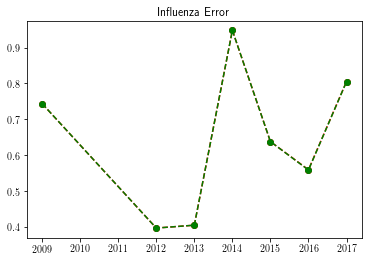

In [18]:
plt.title("Influenza Error")
plt.plot(errorFlu[0],errorFlu[1],'or--',errorFlu_Interactive[0],errorFlu_Interactive[1],'og--')
plt.show()

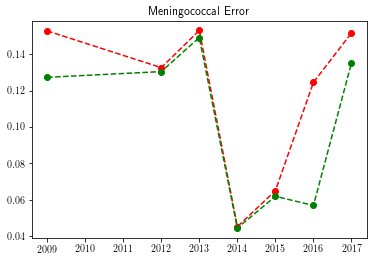

In [17]:
plt.title("Meningococcal Error")
plt.plot(errorMen[0],errorMen[1],'or--',errorMen_Interactive[0],errorMen_Interactive[1],'og--')
plt.show()